## 資料集簡介

* [CIFAR-10 資料集](https://www.cs.toronto.edu/~kriz/cifar.html)共有 60000 個 32x32 彩色圖像，有 50000 個訓練圖像和 10000 個測試圖像。共有 10 種分類：飛機(airplane)、汽車(automobile)、鳥(bird)、貓(cat)、鹿(deer)、狗(dog)、青蛙(frog)、船(ship)、卡車(truck)

## 匯入套件

In [2]:
# 相容性需求，若使用舊版 pyton 時，可使用新版 python 函式
import numpy as np
import pandas as pd 
from keras.utils import np_utils  # 欲將 Label 標籤轉換為 One-hot encoding

In [3]:
import matplotlib.pyplot as plt

# 設定 matplotlib 在 jupyter notebook 網頁內顯示圖形，無則另開視窗顯示圖形
%matplotlib inline

In [4]:
np.random.seed(10)                # 設定 seed 可以讓每次需要隨機產生的資料，都有相同的輸出

In [5]:
# 匯入資料
from keras.datasets import cifar10

# 建立模型
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

## 資料讀取

* Windows：目錄如 C:\Users\kevin\.keras\datasets
* Linux Ubuntu：指令如 ll ~/.keras/datasets/cifar-10-batches-py

In [6]:
#  程式會檢查是否有 cifar10 檔案，如果沒有就會下載檔案，並解壓縮檔案
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [7]:
print('train :', len(x_img_train))
print('test :', len(x_img_test))
# 有5萬筆訓練; 1萬筆測試

print('train image shape :', x_img_train.shape)
# 總共有5萬張影像，每一張影像是32*32*3，最後一個3表示為RGB彩色影像
print('trian label shape :', y_label_train.shape)

train : 50000
test : 10000
train image shape : (50000, 32, 32, 3)
trian label shape : (50000, 1)


In [8]:
# 來看第0筆資料長甚麼樣子

print(x_img_test[0])
print(y_label_test[0])

[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ...
  [ 38  97 146]
  [ 13  64 108]
  [ 40  85 127]]

 [[ 61 116 168]
  [ 49 102 148]
  [ 35  85 132]
  ...
  [ 26  82 130]
  [ 29  82 126]
  [ 20  64 107]]

 [[ 54 107 160]
  [ 56 105 149]
  [ 45  89 132]
  ...
  [ 24  77 124]
  [ 34  84 129]
  [ 21  67 110]]]
[3]


In [9]:
# 來看多筆的image and label

# 先把分類轉換成文字
label_dict={0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 
            5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

## 把影像畫出來

In [10]:
# 建立函數要來畫多圖的(數字影像, 真時值, 預測結果, 開始顯示的資料index, 要顯示的資料筆數(預設10,不要超過25))
def plot_images_labels_prediction(images, labels, prediction, idx, num=10): 
  
  # 設定顯示圖形的大小
  fig = plt.gcf()
  fig.set_size_inches(16, 8)

  # 最多25張
  if num>25:num=25

  # 一張一張畫
  for i in range(0, num):

    # 建立子圖形5*5(五行五列)
    ax = plt.subplot(5, 5, i+1)

    # 畫出子圖形
    ax.imshow(images[idx], cmap='binary')

    # 標題和label
    title = str(i)+','+label_dict[labels[i][0]]  # 使用 label_dict 轉換

    # 如果有傳入預測結果也顯示
    if len(prediction) > 0:
      title += '=>'+label_dict[prediction[i]]

    # 設定子圖形的標題大小
    ax.set_title(title, fontsize=10)

    # 設定不顯示刻度
    ax.set_xticks([]);ax.set_yticks([]) 
    # 讀取下一筆 
    idx += 1
  plt.show()  

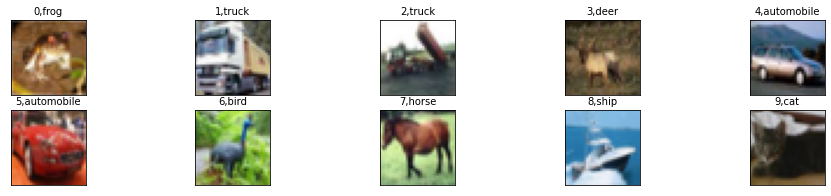

In [11]:
plot_images_labels_prediction(x_img_train, y_label_train, [], 0)

## 資料前處理

In [12]:
print(x_img_train[0][0][0])

# 影像正規化
# normalize all/255
x_img_train_normalize = x_img_train.astype('float32')/255.0
x_img_test_normalize = x_img_test.astype('float32')/255.0

print(x_img_train_normalize[0][0][0])

[59 62 63]
[0.23137255 0.24313726 0.24705882]


In [13]:
# label 正規化 one hot

print(y_label_train[:5])

y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

print(y_label_train_OneHot)
print(y_label_train_OneHot.shape)

[[6]
 [9]
 [9]
 [4]
 [1]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(50000, 10)


## 模型的儲存與載入

In [ ]:
try : 
  models.load_weights('SaveModel/cifarCnnModel.h5')
  print('載入模型成功！繼續訓練模型')
except :
  print('載入模型失敗！開始訓練一個新模型')

## 建立模型

### 訓練過程

* compile 方法對訓練模型進行設定
  * loss：設定損失函數，在深度學習通常使用 cross_entropy 交叉熵，訓練效果比較好
  * optimizer：設定訓練時的最優化方法，在深度學習使用 adam 最優化方法，可讓訓練更快收斂，並提高準確度
  * metrics：設定評估模型的方法是 accuracy 準確率

* 使用 model.fit 進行訓練，訓練過程會儲存在 train_history 變數
  * validation_split=0.2：80% 作為訓練資料，20% 作為驗證資料
  * epoch=10：執行 10 次訓練週期
  * batch_size=128：每一批次 128 筆資料
  * verbose=2：顯示訓練過程，訓練完成後會計算此次訓練週期的 accuracy 與 loss，並記錄新增一筆紀錄在 train_history 中
    →使用40000筆訓練資料進行訓練，每一批次128筆，大約可分313批次進行訓練

In [ ]:
# 建立模型
model=Sequential()

# 建立卷積層1
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))

# 加入dropout
model.add(Dropout(rate=0.25))

# 建立池化層1
model.add(MaxPooling2D(pool_size=(2,2)))

# 建立卷積層2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

# 加入dropout
model.add(Dropout(0.25))

# 建立平坦層
model.add(Flatten())
model.add(Dropout(rate=0.25))

# 建立隱藏層
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

# 建立輸出層
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                        

In [ ]:
# 開始訓練

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.2, epochs=10, batch_size=128, verbose=1)

# 底下跑 10 個 epoch
# 每一個 epoch 每一批資料為 128 筆，所以是總共 40000 筆資料/128一次 = 313

Epoch 1/10
313/313 [==============================] - 232s 740ms/step - loss: 1.6381 - accuracy: 0.4107 - val_loss: 1.3447 - val_accuracy: 0.5232
Epoch 2/10
313/313 [==============================] - 212s 676ms/step - loss: 1.2331 - accuracy: 0.5558 - val_loss: 1.1614 - val_accuracy: 0.6023
Epoch 3/10
313/313 [==============================] - 213s 679ms/step - loss: 1.0844 - accuracy: 0.6148 - val_loss: 1.0754 - val_accuracy: 0.6272
Epoch 4/10
313/313 [==============================] - 214s 684ms/step - loss: 0.9517 - accuracy: 0.6675 - val_loss: 0.9849 - val_accuracy: 0.6633
Epoch 5/10
313/313 [==============================] - 213s 681ms/step - loss: 0.8244 - accuracy: 0.7090 - val_loss: 0.9546 - val_accuracy: 0.6745
Epoch 6/10
313/313 [==============================] - 213s 682ms/step - loss: 0.7021 - accuracy: 0.7536 - val_loss: 0.9508 - val_accuracy: 0.6678
Epoch 7/10
313/313 [==============================] - 215s 687ms/step - loss: 0.5918 - accuracy: 0.7918 - val_loss: 0.9034 -

* 結果
  * 準確率越來越高，且「acc 訓練的準確率」比「val_acc 驗證的準確率」高
  * 驗證的誤差越來越低，且「loss 訓練的誤差」比「val_loss 驗證的誤差」小
  * loss(誤差)越來越小，accuracy(準確率)越來越高
  * 若「acc 訓練的準確率」一直增加，但「val_acc 驗證的準確率」一直沒增加，就可能是 overfitting 過度擬合的現象
  * 若「acc 訓練的準確率」與「val_acc 驗證的準確率」差距很小，代表已改善 overfitting 的問題

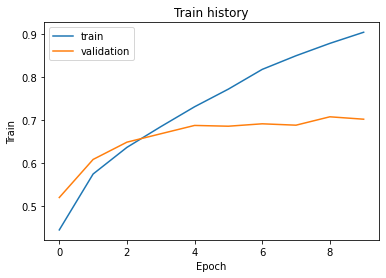

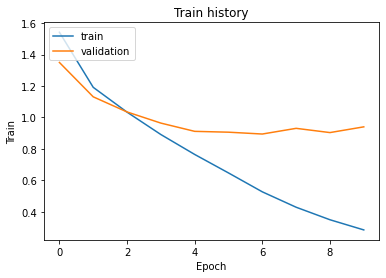

In [ ]:
def show_train_history(train_history, train, validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('Train')
  plt.xlabel('Epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'], loc='upper left')
  plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

### 評估模型準確率

In [ ]:
scores = model.evaluate(x_img_train_normalize, y_label_train_OneHot)
print()
print('\t[Info] Accuracy of testing data = {:2.1f}%'.format(scores[1]*100.0))

1563/1563 [==============================] - 6s 4ms/step - loss: 0.2996 - accuracy: 0.9217

	[Info] Accuracy of testing data = 92.2%


## Predict Data

### 評估模型

In [ ]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('\t[Info] Accuracy of testing data = {:2.1f}%'.format(scores[1]*100.0))

313/313 [==============================] - 1s 4ms/step - loss: 0.9553 - accuracy: 0.6972

	[Info] Accuracy of testing data = 69.7%


### 執行預測

In [ ]:
prediction = np.argmax(model.predict(x_img_test_normalize), axis=1)       # 預測結果存在 prediction 變數
prediction[:10]

array([3, 1, 8, 0, 6, 6, 5, 6, 3, 1])

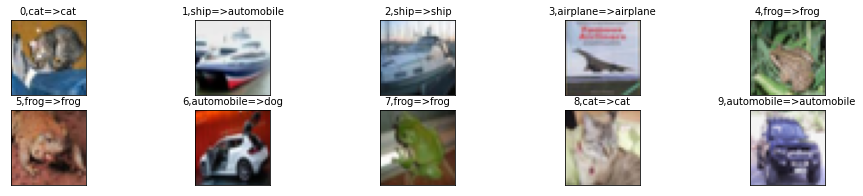

In [19]:
plot_images_labels_prediction(x_img_test, y_label_test, prediction, 0, 10)

In [20]:
Predicted_Probability = model.predict(x_img_test_normalize)

label: cat , predict: cat


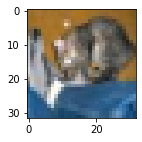

airplaneProbability: 0.000072347
automobileProbability: 0.000007944
birdProbability: 0.000034235
catProbability: 0.964769483
deerProbability: 0.000018663
dogProbability: 0.034825657
frogProbability: 0.000007723
horseProbability: 0.000083995
shipProbability: 0.000169033
truckProbability: 0.000010804


In [23]:
def show_Predicted_Probability(y, prediction, x_img, Predicted_Probability, i):
  print('label:', label_dict[y[i][0]],
        ', predict:', label_dict[prediction[i]])
  plt.figure(figsize=(2,2))
  plt.imshow(np.reshape(x_img_test[i], (32,32,3)))
  plt.show()
  for j in range(10):
    print(label_dict[j]+'Probability: %1.9f'%(Predicted_Probability[i][j]))

show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability, 0)

label: airplane , predict: airplane


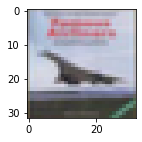

airplaneProbability: 0.788102150
automobileProbability: 0.000939240
birdProbability: 0.080830075
catProbability: 0.000147671
deerProbability: 0.001501073
dogProbability: 0.000000215
frogProbability: 0.000021288
horseProbability: 0.000018395
shipProbability: 0.128088564
truckProbability: 0.000351437


In [24]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability, 3)

### 混淆矩陣 confussion table

In [25]:
print(label_dict)
pd.crosstab(y_label_test.reshape(-1), prediction,rownames=['label'], colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,757,8,40,34,15,8,13,6,95,24
1,21,766,8,26,11,18,10,5,35,100
2,55,2,532,97,132,80,51,27,14,10
3,13,7,54,549,106,175,54,21,9,12
4,16,2,61,63,752,37,22,35,11,1
5,10,4,52,197,63,599,26,39,8,2
6,6,3,39,86,83,43,723,7,9,1
7,14,2,26,55,94,73,8,716,4,8
8,53,31,16,26,14,7,6,4,820,23


In [ ]:
model.save_weights('SaveModel/cifarCnnModel.h5')
print('Saved model to disk')

## 第 2 次執行程式

In [ ]:
try : 
  models.load_weights('SaveModel/cifarCnnModel.h5')
  print('載入模型成功！繼續訓練模型')
except :
  print('載入模型失敗！開始訓練一個新模型')

## 建立 3 次的卷積運算神經網路

In [27]:
# 建立模型
model = Sequential()

# 建立卷積層1
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))

# 加入dropout
model.add(Dropout(rate=0.3))

# 建立Conv2D卷積層1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

# 建立池化層1
model.add(MaxPooling2D(pool_size=(2,2)))

# 建立卷積層2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

# 加入dropout
model.add(Dropout(0.3))

# 建立Conv2D卷積層2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

# 建立池化層1
model.add(MaxPooling2D(pool_size=(2,2)))


# 建立卷積層3
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))

# 加入dropout
model.add(Dropout(0.3))

# 建立Conv2D卷積層3
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))

# 建立池化層1
model.add(MaxPooling2D(pool_size=(2,2)))


# 建立平坦層
model.add(Flatten())
model.add(Dropout(rate=0.3))

# 建立隱藏層
model.add(Dense(2500, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(rate=0.3))

# 建立輸出層
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_9 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 64)        0         
                                                      

In [28]:
# 開始訓練

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.2, epochs=50, batch_size=300, verbose=1)

# 底下跑50個 epoch
# 每一個epoch 每一批資料因為為300筆，所以是總共40000筆資料/300一次=133

Epoch 1/50
134/134 [==============================] - 7s 42ms/step - loss: 1.9513 - accuracy: 0.2695 - val_loss: 2.2270 - val_accuracy: 0.2482
Epoch 2/50
134/134 [==============================] - 5s 37ms/step - loss: 1.5060 - accuracy: 0.4378 - val_loss: 1.4934 - val_accuracy: 0.4759
Epoch 3/50
134/134 [==============================] - 5s 37ms/step - loss: 1.2955 - accuracy: 0.5289 - val_loss: 1.2945 - val_accuracy: 0.5471
Epoch 4/50
134/134 [==============================] - 5s 37ms/step - loss: 1.1365 - accuracy: 0.5942 - val_loss: 1.1186 - val_accuracy: 0.5988
Epoch 5/50
134/134 [==============================] - 5s 38ms/step - loss: 1.0066 - accuracy: 0.6423 - val_loss: 1.0815 - val_accuracy: 0.6300
Epoch 6/50
134/134 [==============================] - 5s 38ms/step - loss: 0.9172 - accuracy: 0.6748 - val_loss: 0.9117 - val_accuracy: 0.6866
Epoch 7/50
134/134 [==============================] - 5s 39ms/step - loss: 0.8549 - accuracy: 0.6979 - val_loss: 0.8566 - val_accuracy: 0.6991

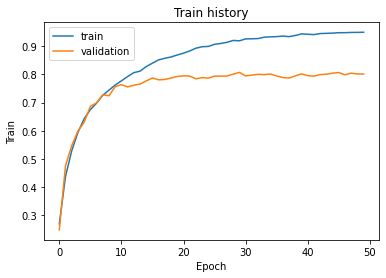

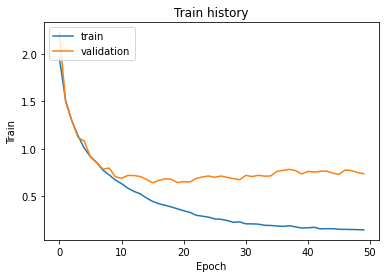

In [29]:
def show_train_history(train_history, train, validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('Train')
  plt.xlabel('Epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'], loc='upper left')
  plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

In [30]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('\t[Info] Accuracy of testing data = {:2.1f}%'.format(scores[1]*100.0))

313/313 [==============================] - 1s 4ms/step - loss: 0.7614 - accuracy: 0.7911

	[Info] Accuracy of testing data = 79.1%


## 優化模型01：標準模式，3 層卷積層

In [14]:
# 建立模型
model = Sequential()

# 建立卷積層1
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))

# 建立池化層1
model.add(MaxPooling2D(pool_size=(2,2)))

# 加入dropout
model.add(Dropout(rate=0.25))

# 建立卷積層2
model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu', padding='same'))

# 建立池化層2
model.add(MaxPooling2D(pool_size=(2,2)))

# 加入dropout
model.add(Dropout(0.5))

# 建立卷積層3
model.add(Conv2D(filters=128,kernel_size=(3,3), activation='relu', padding='same'))

# 建立池化層3
model.add(MaxPooling2D(pool_size=(2,2)))

# 加入dropout
model.add(Dropout(0.5))


# 建立平坦層
model.add(Flatten())
model.add(Dropout(rate=0.25))

# 建立隱藏層
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

# 建立輸出層
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

In [15]:
# 開始訓練

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.2, epochs=30, batch_size=128, verbose=1)

# 底下跑30個 epoch
# 每一個epoch 每一批資料因為為128筆，所以是總共40000筆資料/128一次=313

Epoch 1/30
313/313 [==============================] - 14s 10ms/step - loss: 1.7744 - accuracy: 0.3459 - val_loss: 1.5010 - val_accuracy: 0.4658
Epoch 2/30
313/313 [==============================] - 3s 9ms/step - loss: 1.4568 - accuracy: 0.4684 - val_loss: 1.3396 - val_accuracy: 0.5287
Epoch 3/30
313/313 [==============================] - 3s 9ms/step - loss: 1.3241 - accuracy: 0.5202 - val_loss: 1.2227 - val_accuracy: 0.5715
Epoch 4/30
313/313 [==============================] - 3s 10ms/step - loss: 1.2352 - accuracy: 0.5578 - val_loss: 1.1255 - val_accuracy: 0.6093
Epoch 5/30
313/313 [==============================] - 3s 9ms/step - loss: 1.1660 - accuracy: 0.5837 - val_loss: 1.0055 - val_accuracy: 0.6517
Epoch 6/30
313/313 [==============================] - 3s 9ms/step - loss: 1.1164 - accuracy: 0.6020 - val_loss: 0.9745 - val_accuracy: 0.6743
Epoch 7/30
313/313 [==============================] - 3s 9ms/step - loss: 1.0686 - accuracy: 0.6168 - val_loss: 0.9148 - val_accuracy: 0.6868
Epo

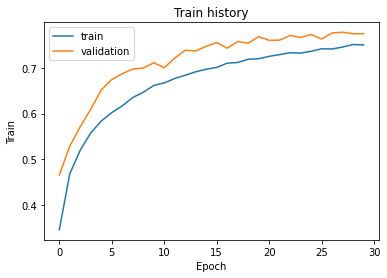

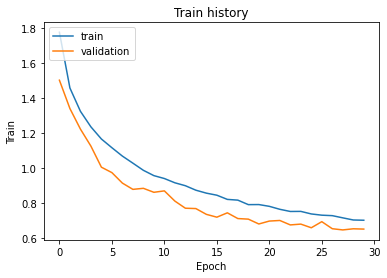

In [16]:
def show_train_history(train_history, train, validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('Train')
  plt.xlabel('Epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'], loc='upper left')
  plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

In [17]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('\t[Info] Accuracy of testing data = {:2.1f}%'.format(scores[1]*100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.6635 - accuracy: 0.7728

	[Info] Accuracy of testing data = 77.3%


## 優化模型02：4 層卷積層

In [42]:
# 建立模型
model = Sequential()

# 建立卷積層1
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))

# 加入dropout
model.add(Dropout(rate=0.25))

# 建立池化層1
model.add(MaxPooling2D(pool_size=(2,2)))

# 建立卷積層2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

# 加入dropout
model.add(Dropout(0.5))

# 建立池化層2
model.add(MaxPooling2D(pool_size=(2,2)))

# 建立卷積層3
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))

# 加入dropout
model.add(Dropout(0.5))

# 建立池化層3
model.add(MaxPooling2D(pool_size=(2,2)))

# 建立卷積層4
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))

# 加入dropout
model.add(Dropout(0.5))

# 建立池化層4
model.add(MaxPooling2D(pool_size=(2,2)))


# 建立平坦層
model.add(Flatten())
model.add(Dropout(rate=0.25))

# 建立隱藏層
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

# 建立輸出層
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_40 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_41 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

In [43]:
# 開始訓練

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.2, epochs=30, batch_size=128, verbose=1)

# 底下跑10個 epoch
# 每一個epoch 每一批資料因為為128筆，所以是總共40000筆資料/128一次=313

Epoch 1/30
313/313 [==============================] - 4s 12ms/step - loss: 1.7475 - accuracy: 0.3511 - val_loss: 1.8377 - val_accuracy: 0.3954
Epoch 2/30
313/313 [==============================] - 4s 12ms/step - loss: 1.3600 - accuracy: 0.5042 - val_loss: 1.6565 - val_accuracy: 0.4316
Epoch 3/30
313/313 [==============================] - 4s 12ms/step - loss: 1.2103 - accuracy: 0.5656 - val_loss: 1.6250 - val_accuracy: 0.4295
Epoch 4/30
313/313 [==============================] - 4s 13ms/step - loss: 1.1379 - accuracy: 0.5933 - val_loss: 1.5304 - val_accuracy: 0.4638
Epoch 5/30
313/313 [==============================] - 3s 11ms/step - loss: 1.0565 - accuracy: 0.6237 - val_loss: 1.3868 - val_accuracy: 0.5200
Epoch 6/30
313/313 [==============================] - 3s 11ms/step - loss: 1.0103 - accuracy: 0.6404 - val_loss: 1.3703 - val_accuracy: 0.5177
Epoch 7/30
313/313 [==============================] - 4s 12ms/step - loss: 0.9651 - accuracy: 0.6560 - val_loss: 1.4167 - val_accuracy: 0.5212

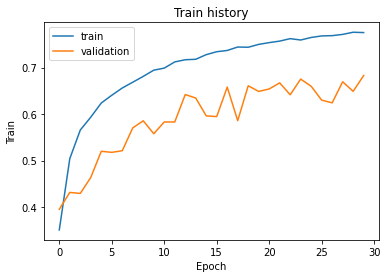

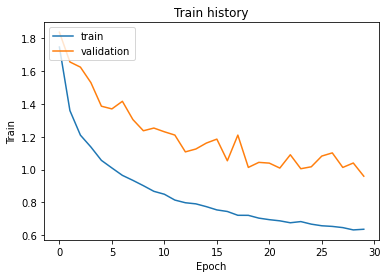

In [44]:
def show_train_history(train_history, train, validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('Train')
  plt.xlabel('Epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'], loc='upper left')
  plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

In [45]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('\t[Info] Accuracy of testing data = {:2.1f}%'.format(scores[1]*100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.9638 - accuracy: 0.6788

	[Info] Accuracy of testing data = 67.9%
